In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle


In [3]:
## Load the Dataset
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## Preprocessing of Data
## Dropping unnecessary columns
data = data.drop(columns=['RowNumber','CustomerId','Surname'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
## Converting categorical columns to numerical values
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [7]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [8]:
## By Get Dummies Method
# geography_dummies = pd.get_dummies(data['Geography'],dtype=float)
# geography_dummies
# data = pd.concat([data.drop('Geography',axis=1),geography_dummies],axis=1)

In [9]:
## One Hot Encoding for Geograph
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
geo_ohe = ohe.fit_transform(data[['Geography']])

In [10]:
ohe.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [11]:
geo_ohe_df = pd.DataFrame(geo_ohe.toarray(),columns=ohe.get_feature_names_out(['Geography']))

In [12]:
geo_ohe_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [13]:
## Combine into one data frame
data = pd.concat([data.drop('Geography',axis=1),geo_ohe_df],axis=1)

In [14]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [15]:
## Saving Encoders and Scalers
with open('label_encoder.pkl','wb') as file:
    pickle.dump(label_encoder,file)

with open('ohe.pkl','wb') as file:
    pickle.dump(ohe,file)



In [16]:
## Divide the dataset into independent and dependent features
X = data.drop('Exited',axis=1)
y = data['Exited']

## Split into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Scale the features
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [17]:
X_test

array([[-0.57749609,  0.91324755, -0.6557859 , ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.29729735,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.52560743, -1.09499335,  0.48508334, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987, -1.09499335,  0.77030065, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.41876609,  0.91324755, -0.94100321, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.91324755,  0.00972116, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [18]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [19]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [20]:
(X_train.shape[1],)

(12,)

## ANN Implementation

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [22]:
## Building ANN model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),## First Hidden Layer Connected with Input Layer
    Dense(32,activation='relu'),## Hidden Layer 2
    Dense(1,activation='sigmoid')## Output Layer

])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [25]:
## Compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

In [26]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%H%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [27]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [28]:
## Training Model
history = model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100


250/250 [==============================] - 8s 17ms/step - loss: 0.4060 - accuracy: 0.8331 - val_loss: 0.3577 - val_accuracy: 0.8570
Epoch 2/100
250/250 [==============================] - 3s 14ms/step - loss: 0.3563 - accuracy: 0.8546 - val_loss: 0.3475 - val_accuracy: 0.8585
Epoch 3/100
250/250 [==============================] - 2s 9ms/step - loss: 0.3488 - accuracy: 0.8572 - val_loss: 0.3540 - val_accuracy: 0.8490
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3423 - accuracy: 0.8593 - val_loss: 0.3508 - val_accuracy: 0.8550
Epoch 5/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3453 - accuracy: 0.8576 - val_loss: 0.3538 - val_accuracy: 0.8505
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3392 - accuracy: 0.8611 - val_loss: 0.3495 - val_accuracy: 0.8565
Epoch 7/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3365 - accuracy: 0.8618 - val_loss: 0.3433 - val_accuracy: 0

In [29]:
model.save('model.h5')

d:\Udemy Gen AI\ANN\annenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


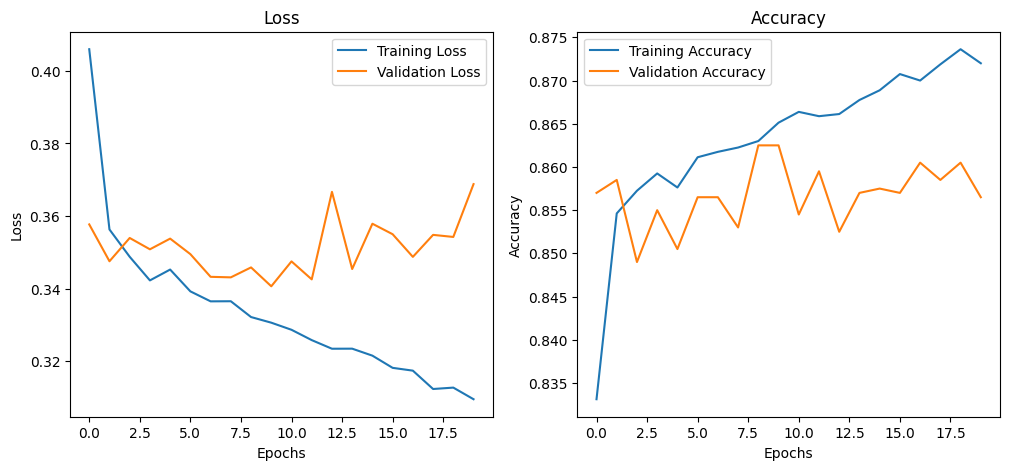

In [33]:
import matplotlib.pyplot as plt
def plot_metrics(history):
    # Plot loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Call the function to plot
plot_metrics(history)